# 출처
subway-https://data.seoul.go.kr/dataList/OA-12035/S/1/datasetView.do

build-https://data.seoul.go.kr/dataList/11048/S/2/datasetView.do

park-https://data.seoul.go.kr/dataList/DT201004O1000132008/S/2/datasetView.do

pop-https://data.seoul.go.kr/dataList/OA-22178/S/1/datasetView.do

sale-https://data.seoul.go.kr/dataList/OA-22175/S/1/datasetView.do

store-https://data.seoul.go.kr/dataList/OA-22172/S/1/datasetView.do

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_pop=pd.read_csv("pop.csv",encoding='CP949')
df_park=pd.read_csv("park.csv",encoding='UTF-8')
df_sale=pd.read_csv("sale.csv",encoding='CP949')
df_store=pd.read_csv("store.csv",encoding='CP949')
df_subway=pd.read_csv("subway.csv",encoding='CP949')
df_build=pd.read_csv("build.csv",encoding='UTF-8')

In [3]:
#df_sale - 2022년 자료
#d_pop - 2022년 자료만 엑셀에서 채택

In [4]:
print(df_pop.info(),'\n')
print(df_park.info(),'\n')
print(df_sale.info(),'\n')
print(df_store.info(),'\n')
print(df_subway.info(),'\n')
print(df_build.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연분기     1700 non-null   int64 
 1   행정동코드   1700 non-null   int64 
 2   동이름     1700 non-null   object
 3   총유동인구수  1700 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 53.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구이름        451 non-null    object
 1   동이름        451 non-null    object
 2   공영민영개수총합계  451 non-null    int64 
 3   공영민영면적총합계  451 non-null    int64 
 4   공영개수       451 non-null    object
 5   공영면수       451 non-null    object
 6   민영개수       451 non-null    int64 
 7   민영면수       451 non-null    int64 
 8   노상총개수      451 non-null    object
 9   노상총면수      451 non-null    object
 10  노상시영개수     451 non-null    object
 11  노상시

In [5]:
print(df_pop.isna().sum(),'\n')
print(df_park.isna().sum(),'\n')
print(df_sale.isna().sum(),'\n')
print(df_store.isna().sum(),'\n')
print(df_subway.isna().sum(),'\n')
print(df_build.isna().sum())

연분기       0
행정동코드     0
동이름       0
총유동인구수    0
dtype: int64 

구이름          0
동이름          0
공영민영개수총합계    0
공영민영면적총합계    0
공영개수         0
공영면수         0
민영개수         0
민영면수         0
노상총개수        0
노상총면수        0
노상시영개수       0
노상시영면수       0
노상구영개수       0
노상구영면수       0
노외총합개수       0
노외총합면수       0
노외시영개수       0
노외시영면수       0
노외구영개수       0
노외국영면수       0
노외민영개수       0
노외민영면수       0
건축물총개수       0
건축물총면적       0
일반주택개수       0
일반주택면적       0
공동주택개수       0
공동주택면적       0
일반건축물개수      0
일반건축물면적      0
dtype: int64 

연분기                0
행정동코드              0
동이름                0
업종코드               0
업종명                0
당월매출               0
당월매출건수             0
주중매출               0
주말매출               0
월요일매출              0
화요일매출              0
수요일매출              0
목요일매출              0
금요일매출              0
토요일매출              0
일요일매출              0
매출0006             0
매출0611             0
매출1114             0
매출1417             0
매출1721             0
매출2124             0
남성매출      

In [6]:
#1.df_pop전처리
#df_pop.head()
#엑셀 선행 처리 - 열이름 정리, 2022년 자료 발췌

df_pop
#df_pop.info() #NAN 없음
#df_pop.describe() #0이나 그 미만 변수 없음
#열 4개, 남녀 / 연령 / 시간 / 요일로 나누어져 있음
q=df_pop.query('연분기==20221')#425
w=df_pop.query('연분기==20222')#425
e=df_pop.query('연분기==20223')#425
r=df_pop.query('연분기==20224')#425
s1=pd.merge(q,w, how="inner",on='행정동코드')
s2=pd.merge(e,r, how="inner",on='행정동코드')
s3=pd.merge(s1,s2, how="inner",on='행정동코드')#425
s3['22년평균유동인구수']=(s3['총유동인구수_x_x']+s3['총유동인구수_x_y']+s3['총유동인구수_y_x']+s3['총유동인구수_y_y'])/4
df_pop=s3[['22년평균유동인구수','행정동코드','동이름_x_x']]
df_pop.rename(columns={'동이름_x_x':'동이름'},inplace=True)

#2022년의 각 분기에 대한 인구 관련 데이터와 관련 DataFrame을 필터링, 병합, 평균 계산, 특정 열 선택 및 열 이름 변경하는 작업을 수행
#DataFrame df_pop은 평균 인구 흐름, 행정 구역 코드 ('행정동코드'), 및 구역 이름 ('동이름')을 포함

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/144488394.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop.rename(columns={'동이름_x_x':'동이름'},inplace=True)


In [7]:
#2.df_park전처리
#엑셀 선행 처리 - 열 정리
#df_park.head()
#df_park.info() #NAN 없음
#df_park.describe()

#노상,노외 : 노상은 도로쪽, 노외는 도로 쪽 아닌 건물 근처
#노상은 시영 구영만 #노외는 시영구영면민영만
#시영은 시나 지방자치단체가 운영
#구영은 특정 지역의 주민 또는 기업체가 운영
#민영은 민간인이 운영

df_park=df_park[['구이름','동이름','공영민영개수총합계','공영민영면적총합계','노상총개수','노외총합개수','건축물총개수']]
df_park.columns=['구이름','동이름','동별공영민영개수총합계','동별공영민영면적총합계','동별노상총개수','동별노외총합개수','동별건축물총개수']
#1.non null but '-' 표시가 있음
#2.주차장과 일반건축물에 대한 정보가 있음
#3.2022년 자료

#동이름의 소계를 제거(필요없는 자료)
result1 = np.where(df_park['동이름'] =='소계', False, True)
df_park=df_park[result1] #426개
df_park.info() #노상총개수와 노외총개수를 float형으로 변경

# '-'값 제거
result2 = (df_park!='-')
df_park=df_park[result2]
df_park.info()#노상총개수 18개, 노외총합개수 30개정도 NAN / 측정X -> 0으로 변경
df_park=df_park.fillna(0)#NAN을 0으로 채움
df_park

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1 to 450
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   구이름          426 non-null    object
 1   동이름          426 non-null    object
 2   동별공영민영개수총합계  426 non-null    int64 
 3   동별공영민영면적총합계  426 non-null    int64 
 4   동별노상총개수      426 non-null    object
 5   동별노외총합개수     426 non-null    object
 6   동별건축물총개수     426 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 26.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1 to 450
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   구이름          426 non-null    object
 1   동이름          426 non-null    object
 2   동별공영민영개수총합계  426 non-null    int64 
 3   동별공영민영면적총합계  426 non-null    int64 
 4   동별노상총개수      408 non-null    object
 5   동별노외총합개수     396 non-null    object
 6   동별건축물총개수     426 non-null    int64 
dty

,구이름,동이름,동별공영민영개수총합계,동별공영민영면적총합계,동별노상총개수,동별노외총합개수,동별건축물총개수
1,종로구,사직동,362,12605,13,9,340
2,종로구,삼청동,343,2237,14,5,324
3,종로구,부암동,596,3533,8,2,586
4,종로구,평창동,1617,9390,20,3,1594
5,종로구,무악동,69,3185,0,0,69
...,...,...,...,...,...,...,...
446,강동구,천호2동,1673,16529,2,3,1668
447,강동구,길동,1734,17661,1,0,1733
448,강동구,강일동,103,16089,2,1,100
449,강동구,상일1동,501,19552,1,0,500


In [8]:
#3.df_sale전처리
#df_sale.head()
df_sale=df_sale[['연분기','행정동코드','동이름','업종코드','업종명','당월매출','당월매출건수']]
#df_sale.info()#결측치 없음
#df_sale.describe() #0 이하값 없음

#주중주말 / 요일 / 시간대 / 남여 / 연령
#매출과 건수로 나누어져 있음
df_sale=df_sale.query('연분기==20221 | 연분기==20222 | 연분기==20223 |연분기==20224')#2022년 자료만 발췌
df_sale#67748개의행

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수
0,20221,11110515,청운효자동,CS100001,한식음식점,3.015376e+09,115548
1,20221,11110515,청운효자동,CS100002,중식음식점,4.268588e+07,2382
2,20221,11110515,청운효자동,CS100003,일식음식점,2.114213e+08,9598
3,20221,11110515,청운효자동,CS100004,양식음식점,1.896393e+09,36013
4,20221,11110515,청운효자동,CS100005,제과점,9.243973e+08,68768
...,...,...,...,...,...,...,...
67743,20224,11740700,둔촌2동,CS300028,화초,8.391708e+07,1902
67744,20224,11740700,둔촌2동,CS300029,애완동물,2.432955e+08,7411
67745,20224,11740700,둔촌2동,CS300031,가구,2.727935e+07,41
67746,20224,11740700,둔촌2동,CS300033,철물점,4.517938e+08,2724


In [9]:
#4.df_store전처리
#df_store.head(10) #유사업종점포수는 필요없다고 판단
df_store=df_store[['연분기','행정동코드','동이름','업종코드','업종명','점포수']]
#df_store.info()#결측치 없음
#df_store.describe()#점포수 0 미만 없음

#유사업종점포수 / 개업률 / 폐업률 / 개업수 / 폐업수 / 프렌차이즈수 등이 더 있다.
df_store=df_store.query('연분기==20221 | 연분기==20222 | 연분기==20223 | 연분기==20224')#2022년 자료만 발췌
df_store#141334개의행
df_name=df_store[['업종코드','업종명']]
df_name = df_name.drop_duplicates()
df_name#업종 총100개존재.

,업종코드,업종명
0,CS100001,한식음식점
1,CS100002,중식음식점
2,CS100003,일식음식점
3,CS100004,양식음식점
4,CS100005,제과점
...,...,...
173,CS300042,주유소
275,CS200039,DVD방
336,CS200027,모터사이클수리
380,CS300037,중고차판매


In [10]:
#5.df_subway전처리
#df_subway.head()
#df_subway.info()#이상치 없음
#구별 역개수 count
df_subway['구이름'] = df_subway['구주소'].str.extract(r'(\w+)구') # '##구'로 끝나는 단어 발췌
df_subway[df_subway['구이름'].isna()] #경기도에 위치한 역 7개 존재, 제거
df_subway=df_subway.dropna()
df_subway['구이름']=df_subway['구이름']+'구' #발췌한 단어에 '구'가 누락되어서 따로 뒤에 '구' 추가
df_subway
df_subway=df_subway.groupby(['구이름']).size().reset_index(name='구별역의개수')
df_subway

,구이름,구별역의개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,덕양구,1


In [11]:
#6.df_build전처리
#df_build.head() #구이름, 구별총단독주택개수, 구별총아파트개수
#df_build.info()
#df_build.describe()#0 미만 값 없음
df_build['구별총가구개수']=df_build['구별총단독주택개수']+df_build['구별총아파트개수']
df_build

,구이름,구별총단독주택개수,구별총아파트개수,구별총가구개수
0,종로구,11823,15923,27746
1,중구,5751,26366,32117
2,용산구,13450,39805,53255
3,성동구,9410,68125,77535
4,광진구,14901,33862,48763
5,동대문구,16110,68445,84555
6,중랑구,17751,59121,76872
7,성북구,20892,83701,104593
8,강북구,17134,35997,53131
9,도봉구,8381,65664,74045


In [12]:
#df_sale(67448*7) + df_store(141334*6)

#두 데이터 셋을 합치기 위해서 공통인 열 필요 -> 새로운 열을 만듦
#업종 + 행정동 합친 코드를 만듦 #업종행정코드(키값, 고유값)
df_sale['업종_행정코드']= df_sale['업종코드'].astype(str) + df_sale['행정동코드'].astype(str)
#똑같은 이름을 가진 열이 없어서 공통의 키값을 정의
df_store['업종_행정코드']= df_store['업종코드'].astype(str) + df_store['행정동코드'].astype(str)
#두 데이터프레임을 합칠 때 공통인 부분만 합침
#sale이랑 store 합친 후 분기별로 나눠져 있는 걸 같은 분기별로 합침
df_ss=pd.merge(df_sale,df_store,how="inner",on="업종_행정코드")#(270992)
a=df_ss.query('연분기_x==20221 & 연분기_y==20221')#16830
a1=a[['업종_행정코드','점포수','당월매출','당월매출건수']]
b=df_ss.query('연분기_x==20222 & 연분기_y==20222')#16934
b1=b[['업종_행정코드','점포수','당월매출','당월매출건수']]
c=df_ss.query('연분기_x==20223 & 연분기_y==20223')#16976
c1=c[['업종_행정코드','점포수','당월매출','당월매출건수']]
d=df_ss.query('연분기_x==20224 & 연분기_y==20224')#17008
d1=d[['업종_행정코드','점포수','당월매출','당월매출건수']]

e1=pd.merge(a1,b1, how="inner",on='업종_행정코드')#a1과 b1의 교집합
e2=pd.merge(c1,d1, how="inner",on='업종_행정코드')#c1과 d1의 교집합
e3=pd.merge(e1,e2, how="inner",on='업종_행정코드')#16354개만 살림
e3['22년평균점포수']=(e3['점포수_x_x']+e3['점포수_y_x']+e3['점포수_x_y']+e3['점포수_y_y'])/4
e3['22년평균월매출']=(e3['당월매출_x_x']+e3['당월매출_y_x']+e3['당월매출_x_y']+e3['당월매출_y_y'])/4
e3['22년평균월매출건수']=(e3['당월매출건수_x_x']+e3['당월매출건수_y_x']+e3['당월매출건수_x_y']+e3['당월매출건수_y_y'])/4
df_ss=e3[['업종_행정코드','22년평균점포수','22년평균월매출','22년평균월매출건수']]
#df_ss는 '업종_행정코드', '22년평균점포수', '22년평균월매출', '22년평균월매출건수' 열을 포함하는 새로운 데이터프레임

In [13]:
df_ss['업종코드']=df_ss['업종_행정코드'].str[:8]
df_ss['행정동코드']=df_ss['업종_행정코드'].str[8:]
df_ss['행정동코드']=df_ss['행정동코드'].astype("int")
df_ss #업종행정코드를 분리 -> 행정동 코드 다시 생성 #df_pop과 합치기 위해서

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/236678862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss['업종코드']=df_ss['업종_행정코드'].str[:8]
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/236678862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss['행정동코드']=df_ss['업종_행정코드'].str[8:]
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/236678862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,업종_행정코드,22년평균점포수,22년평균월매출,22년평균월매출건수,업종코드,행정동코드
0,CS10000111110515,92.00,4.055908e+09,138222.00,CS100001,11110515
1,CS10000311110515,14.00,3.427935e+08,12842.00,CS100003,11110515
2,CS10000411110515,47.00,2.331131e+09,41379.50,CS100004,11110515
3,CS10000511110515,20.50,9.116311e+08,68821.75,CS100005,11110515
4,CS10000611110515,7.00,3.206473e+07,3009.00,CS100006,11110515
...,...,...,...,...,...,...
16349,CS30002811740700,16.75,1.733876e+08,3490.25,CS300028,11740700
16350,CS30002911740700,6.00,2.475360e+08,7485.00,CS300029,11740700
16351,CS30003111740700,10.75,4.232108e+07,38.00,CS300031,11740700
16352,CS30003311740700,6.00,3.047499e+08,2548.00,CS300033,11740700


In [14]:
#df_ss와 df_pop을 '행정동코드' 기준으로 합침
df_ssp=pd.merge(df_ss, df_pop,how='inner',on='행정동코드')
#df_ssp + df_park
df_ssp.value_counts()
df_ssp.query('동이름=="신사동"') #신사동 : 강남신사동 / 광진구신사동 존재
                                 #df_park는 '동이름' 기준으로 데이터 전처리 -> 이름 구분해줄 필요가 있음
df_ssp.loc[df_ssp['행정동코드'] == 11620685, '동이름'] = '관악신사동'
df_ssp.loc[df_ssp['행정동코드'] == 11680510, '동이름'] = '강남신사동'
df_park.loc[df_park['구이름'] == '관악구', '동이름'] = '관악신사동'
df_park.loc[df_park['구이름'] == '강남구', '동이름'] = '강남신사동'
df_sspp=pd.merge(df_ssp, df_park,how='inner',on='동이름')
#df_sspp(25개 구에 대한) + df_subway(27개 구에 대한)
df_ssspp=pd.merge(df_sspp, df_subway,how='inner',on='구이름')#16380
#df_ssspp + df_build
df_sssppb=pd.merge(df_ssspp, df_build,on='구이름')#16380
#sale + store + subway + pop + park + build = sssppb

In [15]:
df_sssppb.columns

Index(['업종_행정코드', '22년평균점포수', '22년평균월매출', '22년평균월매출건수', '업종코드', '행정동코드',
       '22년평균유동인구수', '동이름', '구이름', '동별공영민영개수총합계', '동별공영민영면적총합계', '동별노상총개수',
       '동별노외총합개수', '동별건축물총개수', '구별역의개수', '구별총단독주택개수', '구별총아파트개수', '구별총가구개수'],
      dtype='object')

In [16]:
#업종코드별 '업종명' 변수 추가(이전 데이터 처리 과정에서 누락)
df=pd.merge(df_sssppb, df_name,on='업종코드')
df
dfr=df[['구이름','동이름','업종명','22년평균점포수','22년평균월매출','22년평균월매출건수','22년평균유동인구수',
   '동별공영민영개수총합계','동별공영민영면적총합계','동별노상총개수','동별노외총합개수','동별건축물총개수',
   '구별역의개수','구별총가구개수']]
dfr=dfr.drop(['동별노상총개수','동별건축물총개수','동별노외총합개수'],axis=1)#가설 검정에 불필요한 변수 제거
#주차장 개수 그룹 변수 추가 - 범주화(누적비율 기준)
dfr['주차장개수그룹'] = pd.qcut(dfr['동별공영민영개수총합계'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Group1', 'Group2', 'Group3', 'Group4','Group5'])

#업종명 분류(음식점/생활잡화/기타)
a=pd.read_csv("분류.csv")
b=dfr.groupby('업종명').size().reset_index()
#b['업종분류']=a
b['업종분류'] = a['업종명']

b=b.drop(0,axis=1)
#업종명 합침
dfr=pd.merge(dfr, b, how='inner',on='업종명')#16380

#점포 수 그룹화 - 범주화(누적비율 기준)
dfr['점포수그룹'] = pd.qcut(dfr['22년평균점포수'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Group1', 'Group2', 'Group3', 'Group4','Group5'])

#주차장 개수 그룹화 - 범주화(누적비율 기준)
dfr['주차장개수그룹'] = pd.qcut(dfr['동별공영민영개수총합계'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Group1', 'Group2', 'Group3', 'Group4','Group5'])

#구별평균월매출 변수 생성(동별 평균 밖에 없어서 구별로 합침)
r=dfr[['22년평균월매출','구이름']].groupby('구이름').sum().reset_index()
r.columns=['구이름','구별평균월매출']
dfr=pd.merge(dfr, r, how='inner',on='구이름')

#구별평균월매출 그룹화 - 범주화(누적비율 기준)
dfr['구별평균월매출그룹'] = pd.qcut(dfr['구별평균월매출'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Group1', 'Group2', 'Group3', 'Group4','Group5'])

#구별 역의 개수 그룹화 - 범주화(누적비율 기준)
dfr['구별역의개수그룹']= pd.qcut(dfr['구별역의개수'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Group1', 'Group2', 'Group3', 'Group4','Group5'])

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/1309128811.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=sns.heatmap(dfr.corr(),annot=True,fmt='.2f',cmap='Oranges')


<Axes: title={'center': '상관관계 분석'}>

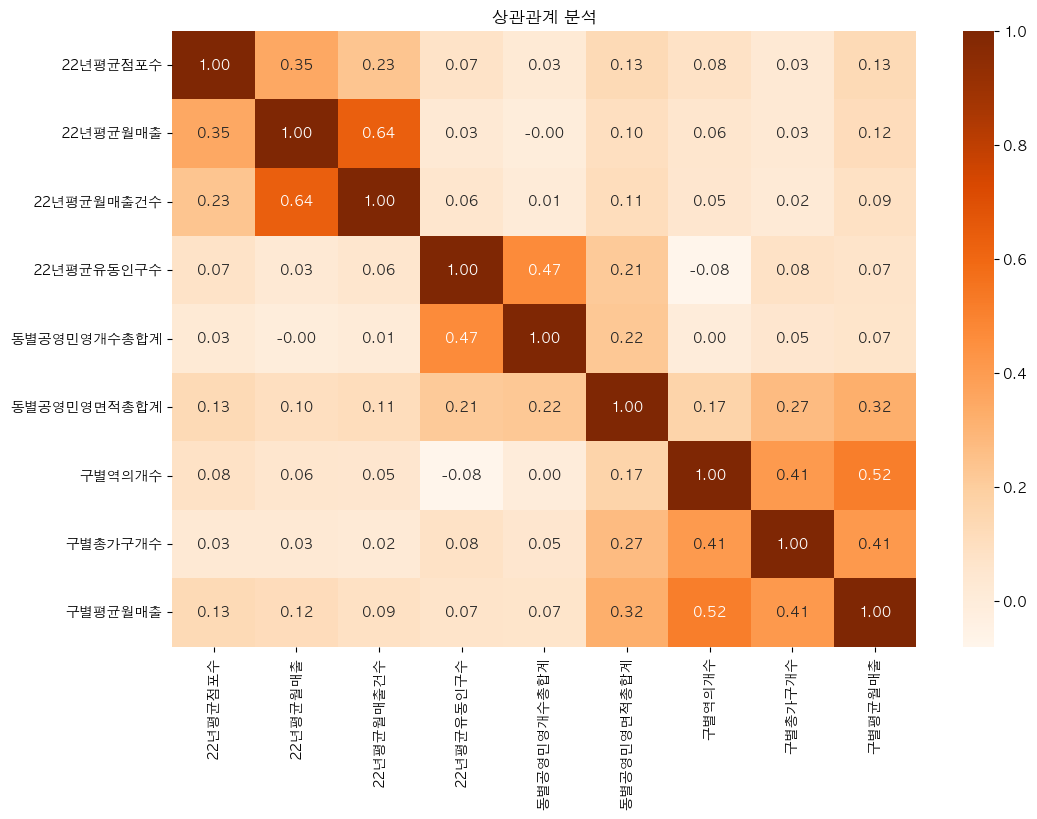

In [17]:
plt.figure(figsize=(12, 8))
plt.title('상관관계 분석')
a=sns.heatmap(dfr.corr(),annot=True,fmt='.2f',cmap='Oranges')
a

Text(0.5, 1.0, '업종 수 내림차순')

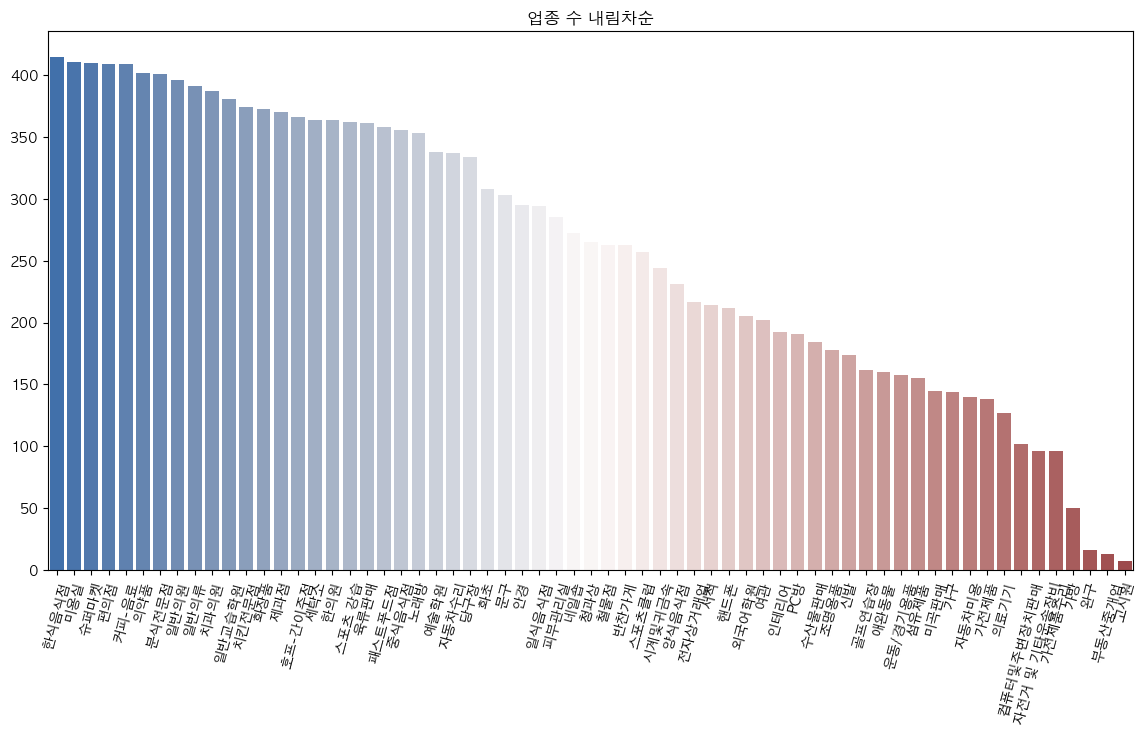

In [18]:
type_shop=dfr['업종명'].value_counts()[:]
plt.figure(figsize=(14, 7))
sns.barplot(x=type_shop.index,y=type_shop.values,palette='vlag')
plt.xticks(rotation=75)
plt.title('업종 수 내림차순',fontweight='bold')


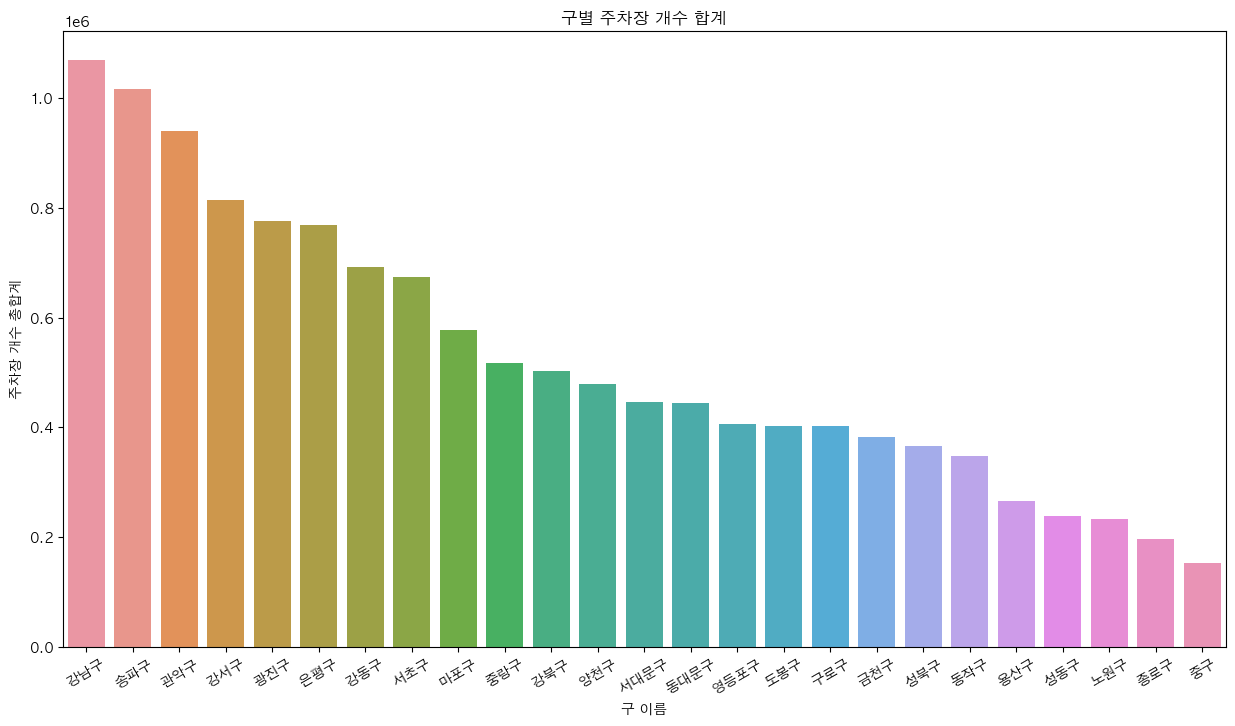

In [19]:
a = dfr.groupby('구이름')['동별공영민영개수총합계'].agg(['sum']).sort_values(by='sum',
                                                               ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=a.index, y='sum', data=a.reset_index())
plt.xticks(rotation=30)
plt.title('구별 주차장 개수 합계')
plt.xlabel('구 이름')
plt.ylabel('주차장 개수 총합계')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


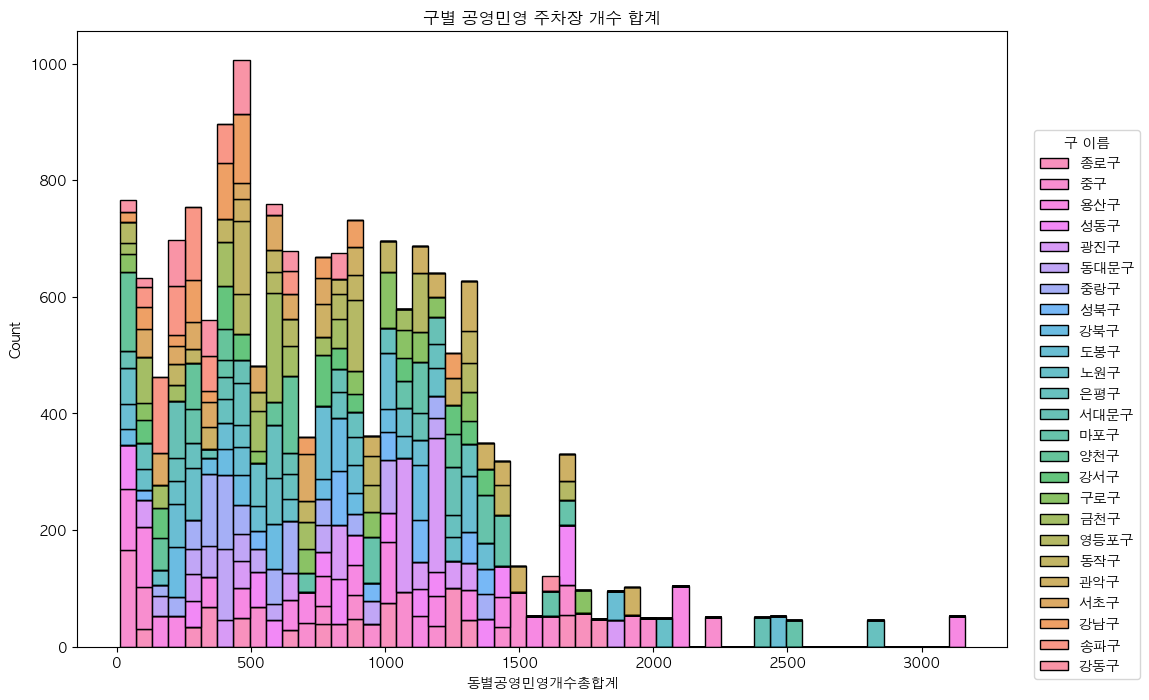

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(data=dfr, x='동별공영민영개수총합계', hue='구이름', multiple='stack')
plt.title('구별 공영민영 주차장 개수 합계')
plt.legend(title='동별공영민영개수총합계', loc='upper right', bbox_to_anchor=(1.15, 1))
legend_labels = dfr['구이름'].unique()
plt.legend(legend_labels, title='구 이름', loc='upper right', bbox_to_anchor=(1.15, 0.85))
plt.show()


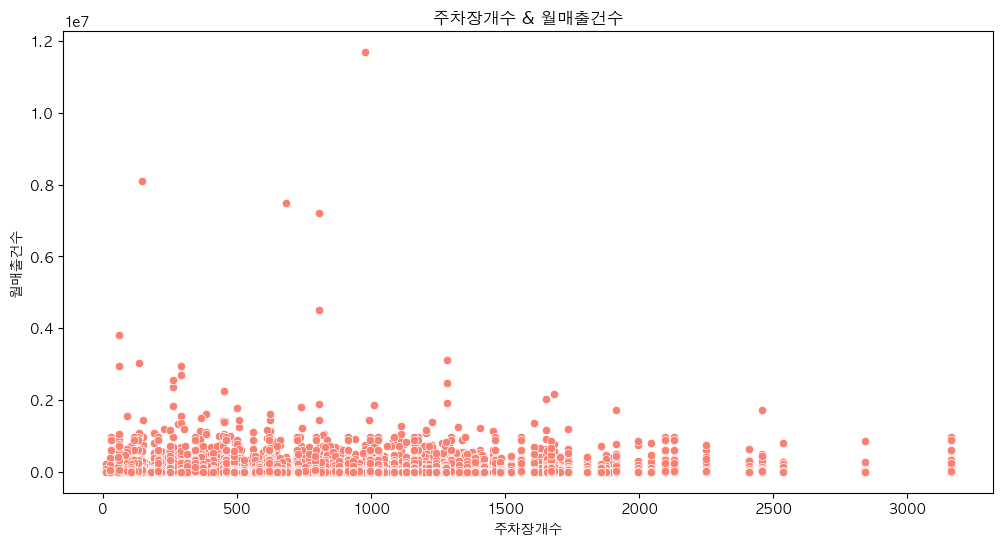

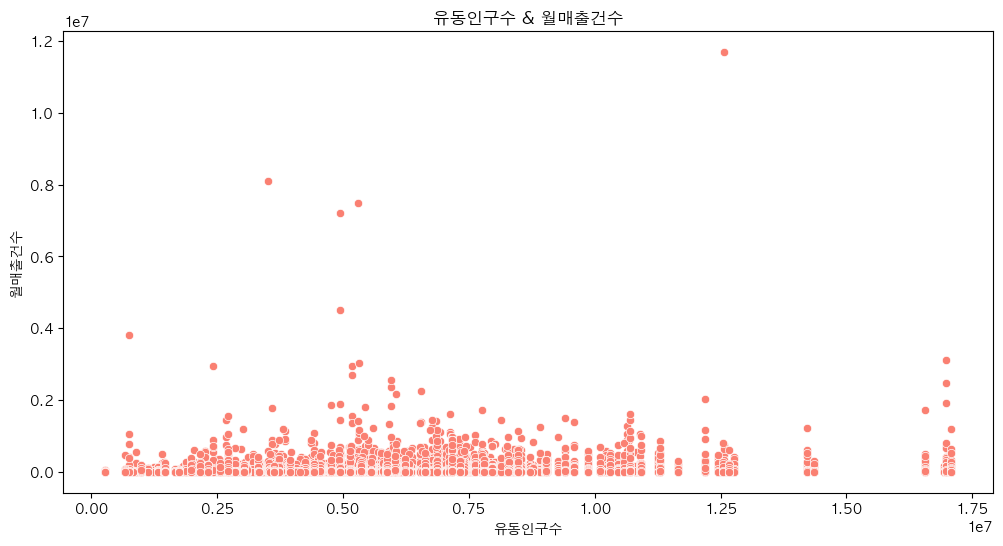

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='동별공영민영개수총합계', y='22년평균월매출건수', data=dfr, color='salmon')
plt.title('주차장개수 & 월매출건수')
plt.xlabel('주차장개수')
plt.ylabel('월매출건수')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='22년평균유동인구수', y='22년평균월매출건수', data=dfr, color='salmon')
plt.title('유동인구수 & 월매출건수')
plt.xlabel('유동인구수')
plt.ylabel('월매출건수')
plt.show()


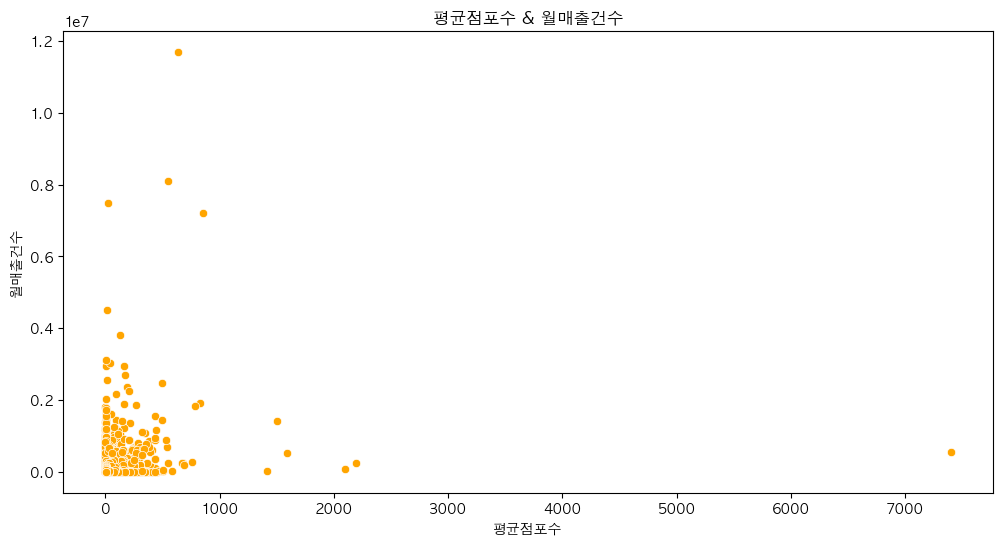

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='22년평균점포수', y='22년평균월매출건수', data=dfr, color='orange')
plt.title('평균점포수 & 월매출건수')
plt.xlabel('평균점포수')
plt.ylabel('월매출건수')
plt.show()

In [23]:
# 가설 검증

In [24]:
#1.t-test(2 sample)
#H0 : 도심권 자치구의 평균 점포 수와 비 도심권 자치구의 평균 점포 수가 같다.
#H1 : 도심권 자치구의 평균 점포 수와 비 도심권 자치구의 평균 점포 수가 다르다.

#처치 : 서울시의 2040 생활권 계획 적용
#처치 적용 O : 도심권 – 종로구, 중구, 용산구
#처치 적용 X : 비 도심권 – 강서구, 도봉구, 노원구

#도심권자치구와 비도심권자치구 변수 형성
dfr1=dfr.query('구이름=="종로구"or 구이름=="중구"or 구이름=="용산구" or 구이름=="강서구" or 구이름=="도봉구" or 구이름=="노원구"')
a=['종로구', '중구', '용산구']
dfr1['자치구'] = dfr1['구이름'].apply(lambda x: '도심권' if x in a else '비도심권')
dfr2=dfr1[['자치구','22년평균점포수']]
b1=dfr2.query('자치구=="도심권"')
b2=dfr2.query('자치구=="비도심권"')
b1=b1.reset_index(drop=True)
b2=b2.reset_index(drop=True)
city=pd.concat([b1,b2],axis=1)
city.columns=['도심권','도심권평균점포수','비도심권','비도심권평균점포수']
#city.csv 파일 따로 생성해서 t-test 진행

x1=city[['도심권평균점포수']].dropna()
x2=city[['비도심권평균점포수']].dropna()
stats.ttest_ind(x1, x2,equal_var=True)
#도심권과 비도심권의 평균 점포 수 차이가 있다.
#유의미한 가설이다.

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_67705/529446843.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr1['자치구'] = dfr1['구이름'].apply(lambda x: '도심권' if x in a else '비도심권')


Ttest_indResult(statistic=array([2.87028437]), pvalue=array([0.00412641]))

In [25]:
#2.ANOVA + Table
#독립변수 : 동별공영민영 주차장 개수에 따른 5개의 그룹
#종속변수 : 평균월매출
#H0 : 주차장 개수에 따른 5개의 그룹의 평균월매출이 동일하다.
#H1 : 주차장 개수에 따른 5개의 그룹의 평균월매출이 적어도 하나 이상은 다르다.

from statsmodels.formula.api import ols
model = ols('Q("22년평균월매출") ~ 주차장개수그룹', data= dfr).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#주차장 개수에 따른 5개의 그룹의 평균월매출이 동일하다.(영가설 기각 실패)
#주차장 개수가 많다고 동별 월매출이 높은 것은 아니다.

,sum_sq,df,F,PR(>F)
주차장개수그룹,7.430360e+20,4.0,1.744584,0.137094
Residual,1.743570e+24,16375.0,NaN,NaN


In [26]:
#2.ANOVA + Table
#독립변수 : 동별공영민영 주차장 개수에 따른 5개의 그룹
#종속변수 : 평균유동인구수
#H0 : 주차장 개수에 따른 5개의 그룹의 평균유동인구수가 동일하다.
#H1 : 주차장 개수에 따른 5개의 그룹의 평균유동인구수가 적어도 하나 이상은 다르다.

from statsmodels.formula.api import ols
model = ols('Q("22년평균유동인구수") ~ 주차장개수그룹', data= dfr).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#주차장 개수에 따른 5개의 그룹의 평균유동인구수가 동일하지 않다.(영가설 기각)
#주차장의 개수가 따라 유동인구수 차이가 있다.(유의미함)
#주차장의 개수가 많을수록 유동인구수가 많다.
#사후검정을 통해 어느 그룹 간 평균 차이가 발생했는지 확인

,sum_sq,df,F,PR(>F)
주차장개수그룹,2.759998e+16,4.0,1196.860312,0.0
Residual,9.440320e+16,16375.0,NaN,NaN


In [27]:
#2-1 사후검정 Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(dfr['22년평균유동인구수'], dfr['주차장개수그룹'], alpha=0.05)
hsd.summary()
#모든 그룹 간 평균의 차이가 있다.
#주차장 개수와 유동인구수 - 관계성 강함

group1,group2,meandiff,p-adj,lower,upper,reject
Group1,Group2,1053183.8078,0.0,891441.1562,1214926.4594,True
Group1,Group3,1965213.6364,0.0,1803894.3271,2126532.9457,True
Group1,Group4,2719801.0968,0.0,2558788.2089,2880813.9848,True
Group1,Group5,3752507.466,0.0,3590499.4489,3914515.4832,True
Group2,Group3,912029.8286,0.0,749933.809,1074125.8482,True
Group2,Group4,1666617.289,0.0,1504826.2198,1828408.3583,True
Group2,Group5,2699323.6582,0.0,2536542.217,2862105.0995,True
Group3,Group4,754587.4604,0.0,593219.6064,915955.3144,True
Group3,Group5,1787293.8297,0.0,1624933.0221,1949654.6372,True
Group4,Group5,1032706.3692,0.0,870650.0137,1194762.7247,True


In [28]:
#3. Two-way ANOVA
#H0 : 업종 분류(음식점,생활잡화,기타)는 월매출에 영향을 미치지 않는다.
#H1 : 업종 분류(음식점,생활잡화,기타)는 월매출에 영향을 미친다.
#H0 : 점포수(상,중,하)는 월매출에 영향을 미치지 않는다.
#H1 : 점포수(상,중,하)는 월매출에 영향을 미친다.
#H0 : 업종 분류와 점포 수 간의 상호작용이 없다.(SPSS 검증 필요)
#H1 : 업종 분류와 점포 수 간의 상호작용이 없다.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Q("22년평균월매출") ~ 점포수그룹 + 업종분류', data=dfr).fit()

# 업종 분류, 점포수 두 요인을 고려했을 때 월매출 차이가 있다.
# 점포 수 제외 업종 분류와 월매출을 고려했을 때 유의미한 차이가 없다.
# 상호작용을 확인해봐야할 필요성이 있다.

# Two-way ANOVA Table
two_way_anova_table = anova_lm(model, typ=2)
two_way_anova_table

,sum_sq,df,F,PR(>F)
점포수그룹,5.353518e+22,4.0,134.300996,4.404837e-113
업종분류,5.029600e+22,62.0,8.140324,2.431158e-69
Residual,1.625675e+24,16313.0,NaN,NaN


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Assuming '22년평균유동인구수' is the x-axis and '22년평균월매출' is the y-axis
attributions = dfr[['22년평균유동인구수']]
target = dfr[['22년평균월매출']]

attributions_with_intercept = sm.add_constant(attributions)
multi_model = sm.OLS(target.astype(float), attributions_with_intercept.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

# Assuming '도심권평균점포수' and '비도심권평균점포수' are columns in your DataFrame
# x1 = dfr[['도심권평균점포수']].dropna()
# x2 = dfr[['비도심권평균점포수']].dropna()
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If you want to create a plot, add relevant plotting code here
plt.figure(figsize=(14, 8))
# Add your plotting code here
plt.show()


T-statistic: [2.87028437]
P-value: [0.00412641]


<Figure size 1400x800 with 0 Axes>

In [53]:
#4.회귀분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

#H0 : 유동인구수와 평균월매출은 서로 영향을 미치지 않는다.
#H1 : 유동인구수와 평균월매출은 서로 영향을 미친다.

attributions=dfr[['22년평균유동인구수']]
target=dfr[['22년평균월매출']]

attributions_with_intercept = sm.add_constant(attributions)#절편 추가 -> 정확성 증가
multi_model = sm.OLS(target.astype(float), attributions_with_intercept.astype(float))
fitted_multi_model = multi_model.fit()  #fit을 이용해 모델 적합화 진행
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               22년평균월매출   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           0.000448
Time:                        19:33:35   Log-Likelihood:            -4.0091e+05
No. Observations:               16380   AIC:                         8.018e+05
Df Residuals:                   16378   BIC:                         8.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.023e+09   1.99e+08      5.132      0.000    6.32e+08    1.41e+09
22년평균유동인구수   103.6984     29.535      3.511      0.000      45.807     161.590
==============================================================================
Omnibus:                    47596.185   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3175736398.771
Skew:                          40.189   Prob(JB):                         0.00
Kurtosis:                    2158.605   Cond. No.                     1.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

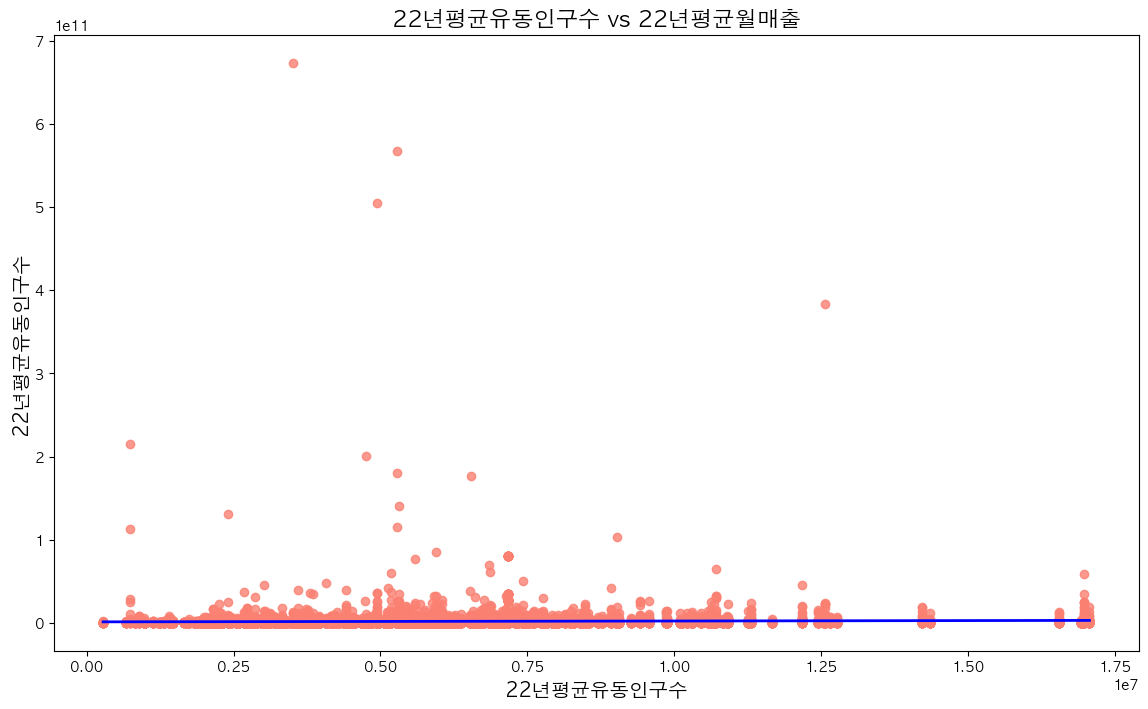

In [61]:
plt.figure(figsize=(14, 8))
sns.regplot(data=dfr, x='22년평균유동인구수', y='22년평균월매출', color='salmon',
            line_kws={'color': 'blue', 'linewidth': 2})
plt.title('22년평균유동인구수 vs 22년평균월매출', fontsize=16)
plt.xlabel('22년평균유동인구수', fontsize=14)
plt.ylabel('22년평균유동인구수', fontsize=14)
plt.show()


In [32]:
#4.회귀분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

#H0 : 평균점포수와 평균월매출은 서로 영향을 미치지 않는다.
#H1 : 평균인구수와 평균월매출은 서로 영향을 미친다.

attributions=dfr[['22년평균점포수']]
target=dfr[['22년평균월매출']]

attributions_with_intercept = sm.add_constant(attributions)#절편 추가 -> 정확성 증가
multi_model = sm.OLS(target.astype(float), attributions_with_intercept.astype(float))
fitted_multi_model = multi_model.fit()  #fit을 이용해 모델 적합화 진행
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               22년평균월매출   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     2278.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:21:35   Log-Likelihood:            -3.9985e+05
No. Observations:               16380   AIC:                         7.997e+05
Df Residuals:                   16378   BIC:                         7.997e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.82e+08   7.95e+07      6.063      0.000    3.26e+08    6.38e+08
22년평균점포수    4.444e+07   9.31e+05     47.727      0.000    4.26e+07    4.63e+07
==============================================================================
Omnibus:                    46528.158   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3347143606.763
Skew:                          37.654   Prob(JB):                         0.00
Kurtosis:                    2216.271   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

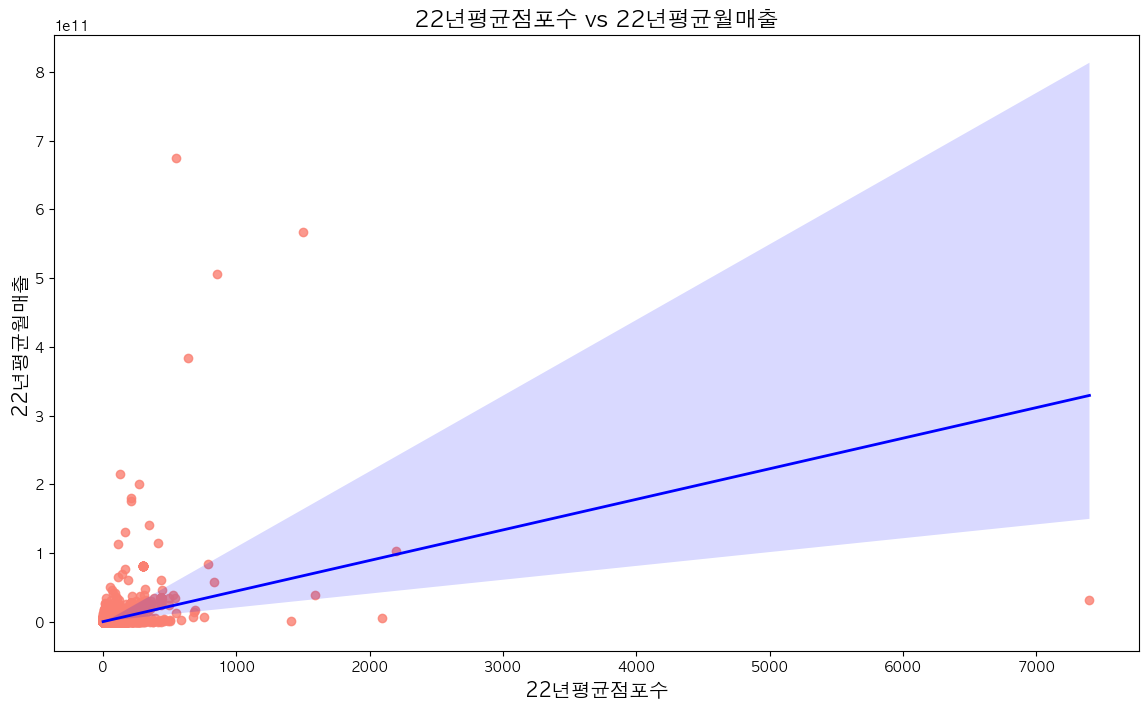

In [62]:
plt.figure(figsize=(14, 8))
sns.regplot(data=dfr, x='22년평균점포수', y='22년평균월매출', color='salmon',
            line_kws={'color': 'blue', 'linewidth': 2})
plt.title('22년평균점포수 vs 22년평균월매출', fontsize=16)
plt.xlabel('22년평균점포수', fontsize=14)
plt.ylabel('22년평균월매출', fontsize=14)
plt.show()


In [34]:
#4.회귀분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

#H0 : 총가구개수와 평균월매출은 서로 영향을 미치지 않는다.
#H1 : 총가구개수와 평균월매출은 서로 영향을 미친다.

attributions=dfr[['구별총가구개수']]
target=dfr[['구별평균월매출']]

attributions_with_intercept = sm.add_constant(attributions)#절편 추가 -> 정확성 증가
multi_model = sm.OLS(target.astype(float), attributions_with_intercept.astype(float))
fitted_multi_model = multi_model.fit()  # fit을 이용해 모델 적합화 진행
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                구별평균월매출   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3373.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:21:35   Log-Likelihood:            -4.8090e+05
No. Observations:               16380   AIC:                         9.618e+05
Df Residuals:                   16378   BIC:                         9.618e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.993e+11   3.09e+10    -12.913      0.000    -4.6e+11   -3.39e+11
구별총가구개수     1.845e+07   3.18e+05     58.079      0.000    1.78e+07    1.91e+07
==============================================================================
Omnibus:                     6829.418   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27556.331
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                       7.777   Cond. No.                     2.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

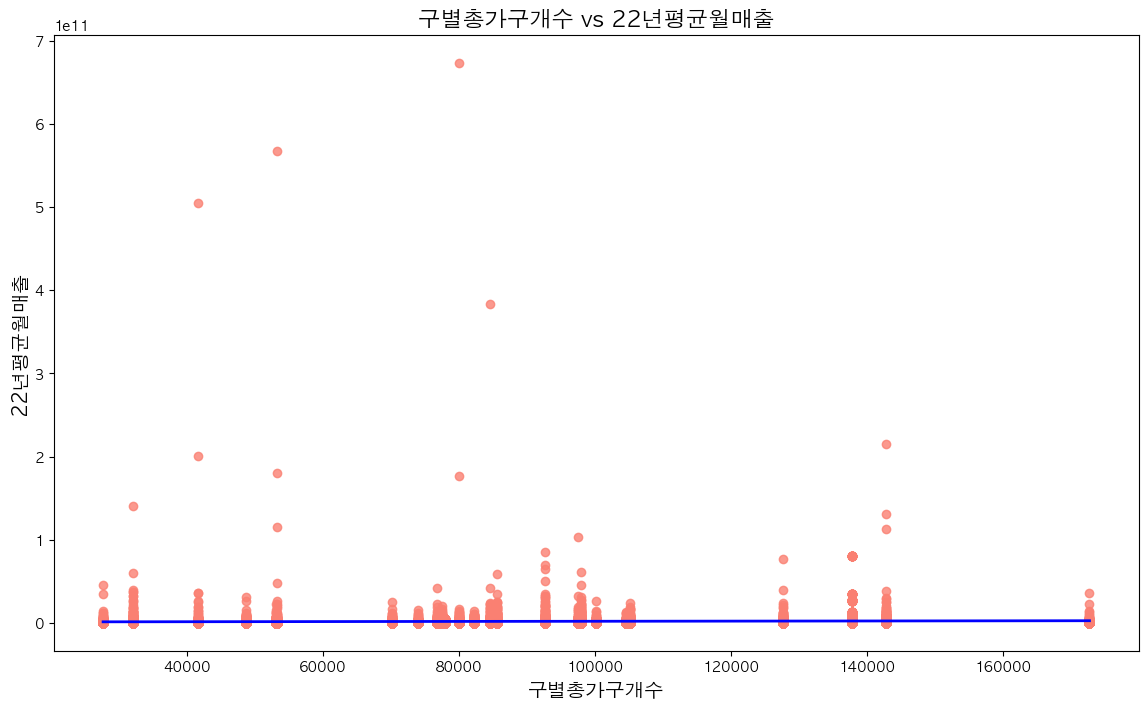

In [64]:
plt.figure(figsize=(14, 8))
sns.regplot(data=dfr, x='구별총가구개수', y='22년평균월매출', color='salmon',
            line_kws={'color': 'blue', 'linewidth': 2})
plt.title('구별총가구개수 vs 22년평균월매출', fontsize=16)
plt.xlabel('구별총가구개수', fontsize=14)
plt.ylabel('22년평균월매출', fontsize=14)
plt.show()


In [36]:
#5.카이스퀘어

#적합도 검정
#변수 : 구별 역 개수 & 구별 평균월매출
#H0 : 구별 역 개수와 구별 평균월매출의 분포가 기댓값과 같다.
#H1 : 구별 역 개수와 구별 평균월매출의 분포가 기댓값과 다르다.

df=dfr[['구이름','구별역의개수그룹','구별평균월매출']]
df= df.drop_duplicates()
a=df.query('구별역의개수그룹=="Group1"')['구별평균월매출'].mean()
b=df.query('구별역의개수그룹=="Group2"')['구별평균월매출'].mean()
c=df.query('구별역의개수그룹=="Group3"')['구별평균월매출'].mean()
d=df.query('구별역의개수그룹=="Group4"')['구별평균월매출'].mean()
e=df.query('구별역의개수그룹=="Group5"')['구별평균월매출'].mean()
from scipy.stats import chisquare

observed_freq=np.array([a,b,c,d,e])
expected_freq = np.array([1/5, 1/5, 1/5, 1/5, 1/5]) * np.sum(observed_freq)
chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)
print(f"카이제곱 통계량: {chi2_stat}")
print(f"p-value: {p_value}")
#구별 역 개수와 구별 평균월매출의 분포가 기댓값과 다르다.(유의미한 결과, 영가설 기각)

카이제곱 통계량: 3797386151977.9956
p-value: 0.0


In [37]:
#1. t-test) 도심권 / 비도심권 점포수 : 유의미
#2. ANOVA) 주차장 개수 - 유동인구수 : 유의미
#2. ANOVA) 주차장 개수 - 월매출 : 유의미X
#3. Two-way ANOVA) 음식점 - 점포수 - 월매출 : 차이 존재, SPSS 검증 필요
#4. 회귀분석) 유동인구수  - 월매출 : 유의미
#4 회귀분석) 점포 수 - 월매출 : 유의미
#4 회귀분석) 구별총가구개수 - 구별월매출 : 유의미
#5 카이스퀘어) 구별역개수 - 구별월매출 : 차이 존재

# 상권 활성화의 정도를 설명가능한 변수 : 월매출, 유동인구 수 (결과)
# 상권활성화 정도를 월매출을 기준으로 나눈다면 유동인구 수 또한 원인으로 작용할 수 있음(반대도 가능)
# 점포 수, 주차장 그룹, 업종 분류, 구별 총 가구, 구별 역 개수 (원인)

# 아이디어 : 상권 활성화 정도에 주변 인프라가 영향을 미친다. '참' 결론 가능성 높음

#1.city (t-test)
#2.df (그 외 test)